In [54]:
import functions
from functions import *
import pandas as pd

file_path = 'parameters.csv'



def check_columns_defined(df):
    required_columns = ['D', 'N','epsilon_2', 'mu']

    for col in required_columns:
        assert col in df.columns, f"Column '{col}' is not defined in the CSV file."


# Read the CSV file into a DataFrame
try:
    input_param = pd.read_csv(file_path, header=0)
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
    exit(1)
except pd.errors.EmptyDataError:
    print(f"Error: File '{file_path}' is empty.")
    exit(1)
except pd.errors.ParserError:
    print(f"Error: Unable to parse file '{file_path}'. Check if it's a valid CSV file.")
    exit(1)



#check all columns are defined
check_columns_defined(input_param)
#import values from csv
epsilon_2= input_param["epsilon_2"].iloc[0]
N = input_param["N"].iloc[0]
#epsilon = L_over_r/N
D = input_param["D"].iloc[0]
mu = input_param["mu"].iloc[0]
#epsilon_2 = epsilon**2
#broadcast values to functions
functions.N = N
functions.D = D
functions.mu = mu
functions.epsilon = np.sqrt(epsilon_2)
functions.epsilon_2 = epsilon_2

#calculate lowest eigenvalue and eigenvector
lowest_EigVector_list = []
for i in range(0,99):
    lowest_EigValue, lowest_EigVector = lowest_eigenvalue_vector(hamiltonian_function,  power_method_tolerance = 1.e-4, conjugate_gradient_tolerance = 1.e-4, max_iters_power_method = 20000, max_iters_conjugate_gradient= 10000)
    lowest_EigVector_list.append(lowest_EigVector)

In [47]:

# #write eigenvector to csv
df_EigVector = pd.DataFrame(lowest_EigVector)
df_EigVector.to_csv(f'eigenvector_{D, N, epsilon_2, mu}.csv', header=None, index=None, sep = ',')

# Initialize arbitrary plane wave function
psi = lowest_EigVector

# Printing the expectation energy for the given wave function psi
print("Expectation Energy:", expectation_energy(psi))

# Printing the expectation momentum for the given wave function psi
print("Expectation Momentum:", expectation_momentum(psi))

# Printing the expectation position for the given wave function psi
print("Expectation Position:", expectation_position(psi))

# Printing the indetermination of momentum for the given wave function psi
print("Indetermination Momentum:", indetermination_momentum(psi))

# Printing the indetermination of position for the given wave function psi
print("Indetermination Position:", indetermination_position(psi))

# Printing the probability for x greater than 0 for the given wave function psi
print("Probability for x > 0:", probability_xg0(psi))

Expectation Energy: 0.48611903360760955
Expectation Momentum: [[1.35177685e-07]]
Expectation Position: [[121.39755581]]
Indetermination Momentum: [[0.02362808]]
Indetermination Position: [[489.35016769]]
Probability for x > 0: 0.8526609518150358


c:\Users\crpdn\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


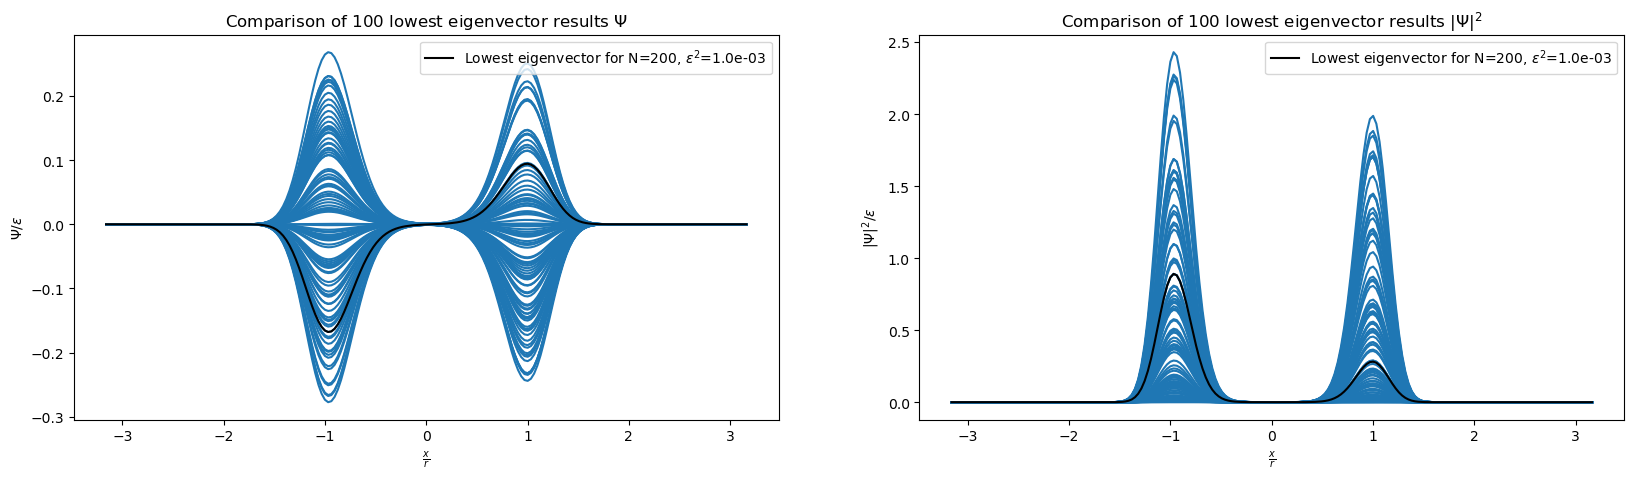

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import functions
from functions import *

csv_file_path = 'eigenvector_(1, 200, 0.001, 20).csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path,header=None)

# Convert the DataFrame to a NumPy array
lowest_EigVector = df.to_numpy(dtype=complex).reshape((200,))
N = 200
D = 1
mu = 20
epsilon_2 = 0.001
epsilon = np.sqrt(epsilon_2)
functions.N = N
functions.D = D
functions.mu = mu
functions.epsilon = np.sqrt(epsilon_2)
functions.epsilon_2 = epsilon_2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.set_title(r'Comparison of 100 lowest eigenvector results $\Psi$')
ax2.set_title(r'Comparison of 100 lowest eigenvector results $|\Psi|^{2}$')
ax1.set_xlabel(r"$\frac{x}{r}$")
ax2.set_xlabel(r"$\frac{x}{r}$")
ax1.set_ylabel(r"$\Psi/ \varepsilon$")
ax2.set_ylabel(r"$|\Psi|^{2}/ \varepsilon$")
x_axis = np.linspace(-N/2,N/2,N)
x_axis= x_axis*epsilon
for lowest_EigVector in lowest_EigVector_list:
    if lowest_EigVector.min().real <0:
        #x_expected = (expectation_position(lowest_EigVector)-N/2)*epsilon
        #x_indetermination = (indetermination_position(lowest_EigVector)-N/2)*epsilon
        ax1.plot(x_axis,lowest_EigVector,color='C0')
        ax2.plot(x_axis,lowest_EigVector.real**2/epsilon,color='C0')
        #plt.axvline(x=x_expected, color='red', linestyle='-', label='Expectation Position')
ax1.plot(x_axis,lowest_EigVector, color='k',label = fr'Lowest eigenvector for N={N}, $\epsilon^{2}$={epsilon_2:.1e}')
ax2.plot(x_axis,lowest_EigVector.real**2/epsilon, color='k',label = fr'Lowest eigenvector for N={N}, $\epsilon^{2}$={epsilon_2:.1e}')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
plt.show()


In [31]:
import functions
from functions import *
import pandas as pd
import numpy as np

file_path = 'parameters2.csv'



def check_columns_defined(df):
    required_columns = ['D', 'N','epsilon_2', 'mu']

    for col in required_columns:
        assert col in df.columns, f"Column '{col}' is not defined in the CSV file."


# Read the CSV file into a DataFrame
try:
    input_param = pd.read_csv(file_path, header=0)
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
    exit(1)
except pd.errors.EmptyDataError:
    print(f"Error: File '{file_path}' is empty.")
    exit(1)
except pd.errors.ParserError:
    print(f"Error: Unable to parse file '{file_path}'. Check if it's a valid CSV file.")
    exit(1)



#check all columns are defined
check_columns_defined(input_param)
#import values from csv
epsilon_2= input_param["epsilon_2"].iloc[0]
N = input_param["N"].iloc[0]
#epsilon = L_over_r/N
D = input_param["D"].iloc[0]
mu = input_param["mu"].iloc[0]
#epsilon_2 = epsilon**2
#broadcast values to functions
functions.N = N
functions.D = D
functions.mu = mu
functions.epsilon = np.sqrt(epsilon_2)
functions.epsilon_2 = epsilon_2

#calculate lowest eigenvalue and eigenvector
lowest_EigValue, lowest_EigVector = lowest_eigenvalue_vector(hamiltonian_function,  power_method_tolerance = 1.e-4, conjugate_gradient_tolerance = 1.e-4, max_iters_power_method = 20000, max_iters_conjugate_gradient= 10000)


KeyboardInterrupt: 

In [26]:
# #write eigenvector to csv
df_EigVector = pd.DataFrame(lowest_EigVector)
df_EigVector.to_csv(f'eigenvector_{D, N, epsilon_2, mu}.csv', header=None, index=None, sep = ',')

# Initialize arbitrary plane wave function
psi = lowest_EigVector

# Printing the expectation energy for the given wave function psi
print("Expectation Energy:", expectation_energy(psi))

# Printing the expectation momentum for the given wave function psi
print("Expectation Momentum:", expectation_momentum(psi))

# Printing the expectation position for the given wave function psi
print("Expectation Position:", expectation_position(psi))

# Printing the indetermination of momentum for the given wave function psi
print("Indetermination Momentum:", indetermination_momentum(psi))

# Printing the indetermination of position for the given wave function psi
print("Indetermination Position:", indetermination_position(psi))

# Printing the probability for x greater than 0 for the given wave function psi
print("Probability for x > 0:", probability_xg0(psi))

Expectation Energy: 0.47869354558609667
Expectation Momentum: [[4.05326512e-06]
 [1.75384753e-05]]
Expectation Position: [[100.032239  ]
 [100.00405169]]
Indetermination Momentum: [[0.01138352]
 [0.01138351]]
Indetermination Position: [[472.51907093]
 [472.51991357]]
Probability for x > 0: 0.5061089619625797


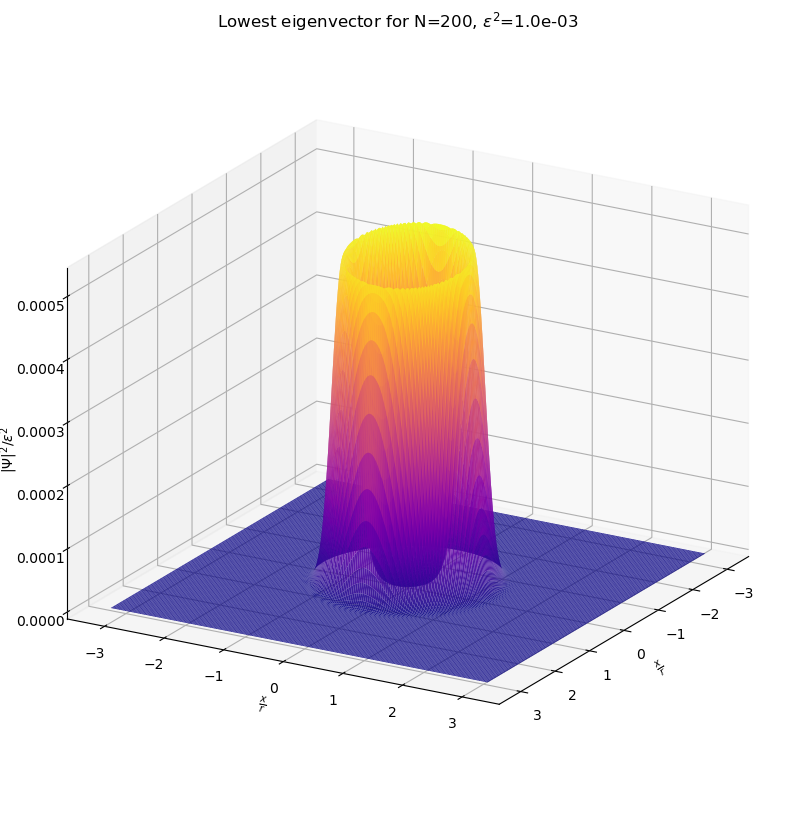

In [8]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import matplotlib.pyplot as plt
import functions
from functions import *

csv_file_path = 'eigenvector_(2, 200, 0.001, 20).csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path, header=None)

# Convert the DataFrame to a NumPy array
lowest_EigVector = df.to_numpy(dtype=complex).reshape(200,200)
N = 200
D = 2
mu = 20
epsilon_2 = 0.001
epsilon = np.sqrt(epsilon_2)
functions.N = N
functions.D = D
functions.mu = mu
functions.epsilon = np.sqrt(epsilon_2)
functions.epsilon_2 = epsilon_2

x_axis = np.linspace(-N/2,N/2,N)
y_axis = np.linspace(-N/2,N/2,N)
X,Y = np.meshgrid(x_axis*epsilon,y_axis*epsilon)
x_expected = (expectation_position(lowest_EigVector)[0][0]-N/2)*epsilon
y_expected = (expectation_position(lowest_EigVector)[1][0]-N/2)*epsilon
x_indetermination = (indetermination_position(lowest_EigVector)[0][0])*epsilon


hf = plt.figure(figsize=(10,20))
ha = hf.add_subplot(111, projection='3d')
ha.view_init(elev=20, azim=30)
ha.set_proj_type('ortho')
plt.title(fr'Lowest eigenvector for N={N}, $\epsilon^{2}$={epsilon_2:.1e}')
plt.xlabel(r"$\frac{x}{r}$")
plt.ylabel(r"$\frac{x}{r}$")
#plt.zlabel(r"$\Psi$")

ha.set_zlabel(r"$|\Psi|^{2}/ \varepsilon^{2}$")
#plt.plot(x_axis,lowest_EigVector, label = fr'Lowest eigenvector for N={N}, $\epsilon$={epsilon_2:.1e}')

ha.plot_surface(X, Y, (lowest_EigVector.real)**2/epsilon_2, cmap='plasma', rstride=1, cstride=1, linewidth=0, alpha=0.9,  label=fr'Lowest eigenvector for N={N}, $\epsilon$={epsilon_2:.1e}')
#ha.set_zlim(0, 0.002)
# ha.plot([x_expected , x_expected],[ y_expected , y_expected],[0. ,0.001], 'r',alpha=1, linewidth=3)
# ha.plot([x_expected+x_indetermination , x_expected+x_indetermination],[ y_expected , y_expected],[0. ,0.001], 'r',alpha=1, linewidth=3)
plt.show()